Database & CrowdCounting-P2PNet/vis folder structures

# Importing & Configuring Modules, and Setting Paths

In [71]:
# Import and configure modules
# Scikit-learn                  # for non deep machine learning methods
import sys
import numpy as np                      # for data storage & manipulation
import pickle
import pandas as pd                     # for data parsing & manipulation
import math
import os, cv2, glob
import argparse
import pandas as pd
import tensorflow as tf             # for deep learning
from matplotlib import pyplot as plt    # for plotting
from collections import Counter
import matplotlib.patches as patches
from matplotlib import rc


In [72]:
# Some basic functions defs - run
def column(matrix, i):
    return [row[i] for row in matrix]

def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)

In [73]:
# Setting paths & Defining some variables
db_dir = "../../../EGH400/database/"   #"/mnt/home/n10203478/EGH400/database/"
p2p_dir = '../' #"/home/n10203478/koaladetection/CrowdCounting-P2PNet" 

alphabet_set = list(map(chr, range(97, 123)))


In [74]:
# Read gt .txt files and save in gt_train, gt_test
with open(os.path.join(db_dir,"train_gt.txt")) as load_file:
    gt_train = [tuple(line.split()) for line in load_file]

with open(os.path.join(db_dir,"test_gt.txt")) as load_file:
    gt_test = [tuple(line.split()) for line in load_file]

gt_test.sort()
gt_train.sort()

tot = ['train','test']
train_test = [gt_train, gt_test]
len(gt_test)

935

In [75]:
# >> WARNING: TAKES ABOUT 5 MINUTES << Store filename, gt count, and image for each .png in test set 
test_array=[]
for file in glob.glob(os.path.join(db_dir,"test/*.png")): 
    img = cv2.imread(file)
    filename = os.path.basename(file)#.split(".")[0]    
    pre = filename.split(".")[0]    
    
    for line in gt_test:
        if line[0] == filename:
            count = line[1]
            test_array.append(tuple([pre,count,img]))   
test_array.sort()  #sorts by 1st column (filename)
len(test_array)

935

# Comparing results from 5 different P2P trains.

In [76]:
p2ptr_names=['run_1','run_2', 'run_3', 'run_4', 'run_5']
num_trains = len(p2ptr_names)
colors = ['c','m','g','tab:orange','b']


[348 915 801 469 497 673]


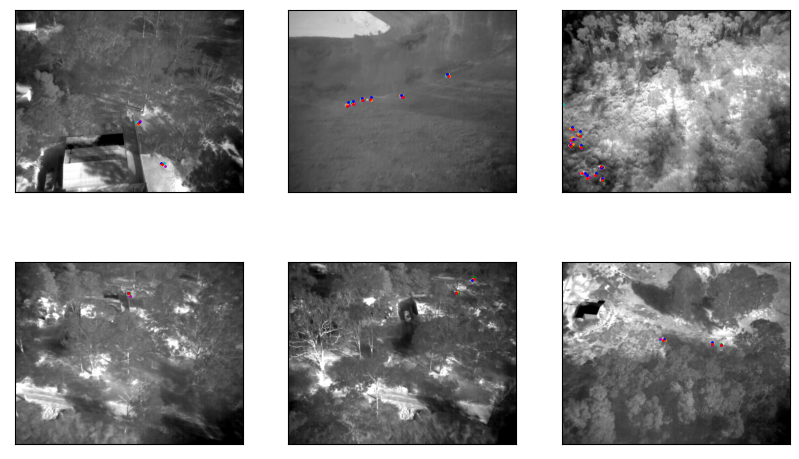

In [158]:
num = 6
randnums= np.random.randint(300,len(test_array),num)

print(randnums)
fig = plt.figure(figsize=[10, 6])
for i in range(num):
    x = randnums[i]
    pts=[]
    for z in range(num_trains): 
        # pts_path = (os.path.join(p2p_dir,"vis","run_"+str[z+1],test_array[x][0]+'.txt'))
        pts_path = (os.path.join(p2p_dir,"vis",p2ptr_names[z],test_array[x][0]+'.txt'))

        with open(pts_path) as load_file:
            pts.append([(line.split()) for line in load_file])
            
    gt_pth = os.path.join(db_dir,"test",test_array[x][0]+'.txt')

    with open(gt_pth) as load_file:
        gt_points = [(line.split()) for line in load_file]

    # draw the predictions
    img_to_draw = cv2.cvtColor((test_array[x][2]), cv2.COLOR_BGR2RGB)

    ax = fig.add_subplot(2, 3, i + 1) #<---------------
    # ax.imshow(cv2.cvtColor(test_array[x][2],cv2.COLOR_BGR2RGB))COLOR_RGB2BGR

    plt.setp(ax, xticks=[], yticks=[])
    # plt.imshow(img_to_draw)
    
    for z in range(num_trains):
        for p in pts[z]:
            x = int(float(p[0])*640)
            y = int(float(p[1])*512)
            plt.scatter(x, y, c=colors[z], s=1)#cv2.circle(img_to_draw, (x,y), size, (0, 0, 255), -1) #RED

    for p in gt_points:
        x = int(float(p[1])*640)
        y = int(float(p[2])*512)
        plt.scatter(x, y, c='r', s=1)

    plt.imshow(img_to_draw)
    # ax.axis('off') 

# fig.subplots_adjust(hspace=0.0)
# fig.savefig('TESTING4.png', dpi=450)

Plot point predictions from different trains

In [159]:
def plot_run_preds(k):
    # k = 820#820, randnums[0]#809
    colors = [[0, 255, 0], [0, 0, 255],[0, 255, 255],[255, 0, 255],[255, 255, 0]]     # lime, blue, cyan, magenta yellow

    # for img in test_array:
    gt_pth = os.path.join(db_dir,"test",test_array[k][0]+'.txt')
    Y=[]
    X=[]
    img_to_draw = cv2.cvtColor((test_array[k][2]), cv2.COLOR_BGR2RGB)
    for i in range(num_trains): 
        pts_path = (os.path.join(p2p_dir,"vis",p2ptr_names[i],test_array[k][0]+'.txt'))
        with open(pts_path) as load_file:
            for lines in load_file:
                line = lines.split()
                x = int(float(line[0])*640)
                y = int(float(line[1])*512)
                Y.append([x,y])
                img_to_draw=cv2.circle(img_to_draw, (x, y), 2, colors[i], -1)

    fig = plt.figure(figsize=[10, 5])
    ax = fig.add_subplot(1, 2, 1)
    plt.title("Overlay of Point Preds from Multiple Trains")#test_array[k][0])
    plt.xlabel('{})'.format(alphabet_set[0]),fontsize=12)
    plt.imshow(img_to_draw)

    # Obtain gt points
    with open(os.path.join(db_dir,"test",test_array[k][0]+'.txt')) as load_file:
        gt_points = [(line.split()) for line in load_file]
    for p in gt_points:
        x = int(float(p[1])*640)
        y = int(float(p[2])*512)
        X.append([x,y])
    
    # Plot
    Y = np.array(Y)
    X = np.array(X)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(test_array[k][2])
    plt.title("Point Preds & Ground Truth Points")
    ax.scatter(Y[:,0], Y[:,1], s=1, c='xkcd:wheat') # plot all pred points
    ax.scatter(X[:,0], X[:,1], s=1, c='r') # plot all gt points
    plt.xlabel('{})'.format(alphabet_set[1]),fontsize=12)

    fig.subplots_adjust(wspace=0.1)
    fig.savefig('./multiple_preds_overlay.png',bbox_inches='tight', dpi=80)

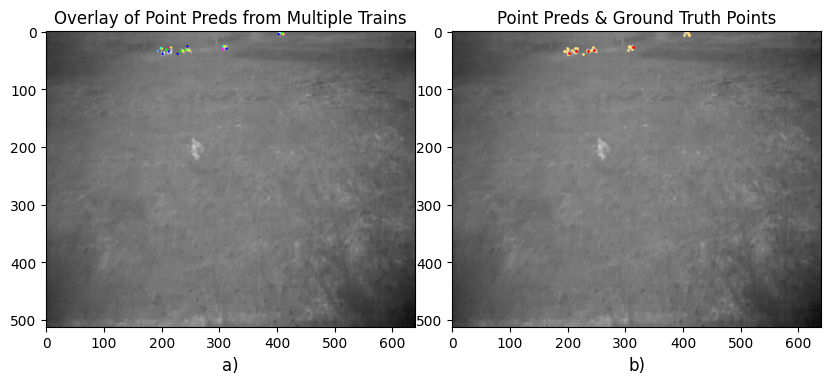

In [160]:
plot_run_preds(928)

In [81]:
# run python misc/clus_scan.py
# check output clus_scan_out_10_test.txt and directory ./scatterimages_10/

### Applying DBSCAN clustering on multiple train results

In [82]:
#import additional modules
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

gt_pts_test = []
for line in gt_test:
    filename = (line[0])
    count = int(line[1])
    gt_pts_test.append([filename, count])

# test_x = column(gt_test, 1)
test_x = list(map(int, column(gt_test, 1)))

In [83]:
def cluster_img(k, num_trains, eps, min_samples, img=False): #outputs filename, no.clusters, mean co-ords
    pts = [] 
    Y = [] 

    filename = test_array[k][0]+".png"

    # Obtain pred points from all 5 trains and store in array Y
    for i in range(num_trains): 
        pts_path = (os.path.join(p2p_dir,"vis","run_"+str(i+1),test_array[k][0]+'.txt'))

        with open(pts_path) as load_file:
            pts.append([(line.split()) for line in load_file])

    for i in range(num_trains): 
        for p in pts[i]:
            x = int(float(p[0])*640)
            y = int(float(p[1])*512)
            Y.append([x,y])
    Y = np.array(Y)

    # Return pred count of 0 if X is empty & skip clustering
    if Y.size < 1:
        K=0
        return[filename, 0]

    else:
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(Y)
        labels = clustering.labels_ # measure the performance of dbscan algo
        K = len(set(labels)) - (1 if -1 in labels else 0) # number of clusters

        # Find Cluster means 
        means = np.array([Y[labels == i].mean(axis=0) for i in range(0, K)])
        means = means.astype(int)

        if img:
            # Initialise image to draw
            # img_to_draw = cv2.cvtColor((test_array[k][2]), cv2.COLOR_BGR2RGB)
            
            # Obtain gt points
            with open(os.path.join(db_dir,"test",test_array[k][0]+'.txt')) as load_file:
                gt_points = [(line.split()) for line in load_file]
            for p in gt_points:
                x = int(float(p[1])*640)
                y = int(float(p[2])*512)
                # X.append([x,y])
                # img_to_draw=cv2.circle(img_to_draw, (x,y), 2, (255, 0, 0), -1)
       
            # # Plot
            fig = plt.figure(figsize=[16, 6])

            ax = fig.add_subplot(1, 2, 1)
            ax.scatter(Y[:,0], Y[:,1], c=clustering.labels_) # plot cluster vis
            ax.axis('on') 

            # fig = plt.figure(figsize=[6, 6])
            ax = fig.add_subplot(1, 2, 2)
            ax.imshow(test_array[k][2])
            ax.scatter((np.array(means)[:,0]), (np.array(means)[:,1]), s=3, c='tab:cyan') # plot consensus detections
            ax.axis('off') 

            print("Gt count: {}".format(len(gt_points)))
            print("No. clusters: {}".format(K))
            
    return[filename, K, means]

In [84]:
def cluster_all(num_trains, eps=5, min_samples=3):
    cluster_points=[]
    # cluster(860, 5, min_samples = 3)
    for m in range(len(gt_test)):
        cluster_points.append(cluster_img(m, num_trains, eps, min_samples, img=False))
    return cluster_points

In [85]:
num_trains = 5
eps = 6.6
minpts = 3

# num_trains = 10
# eps = 5.5
# minpts = 5

In [86]:
# >> WARNING: TAKES ABOUT 8 MINUTES << Obtain cluster results from all images in test set
cluster_pts = cluster_all(num_trains,eps,minpts)
cluster_pts.sort()

### Plot scatterplot of Cluster Results

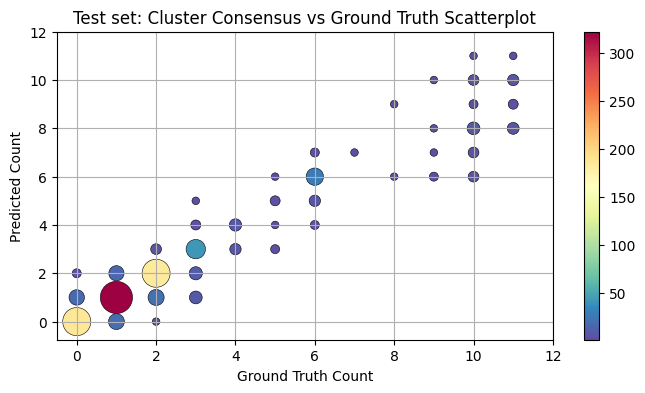

MSE: 0.4288770053475936
MAE: 0.23850267379679144
Accuracy: 83.10160427807487 %


In [87]:
test_y=column(cluster_pts, 1) 

#Generate a list of unique points
points=list(set(zip(test_x,test_y))) 
#Generate a list of point counts
count=[len([x for x,y in zip(test_x,test_y) if x==p[0] and y==p[1]]) for p in points]

# Plotting:
plot_x=[i[0] for i in points]
plot_y=[i[1] for i in points]
count=np.array(count)

fig=plt.figure(figsize=[8,4])
ax=fig.add_subplot(1, 1, 1)
plt.xlim(-0.5, max(test_x)+1)
plt.ylim(-0.75, max(test_y)+1)
plt.scatter(plot_x,plot_y,c=count,s=30*count**0.5,cmap='Spectral_r', linewidths=0.4, edgecolors=(0,0,0))
plt.colorbar()
plt.xlabel('Ground Truth Count'), plt.ylabel('Predicted Count')
plt.title("Test set: Cluster Consensus vs Ground Truth Scatterplot")
plt.grid(), plt.show()

g = zip(plot_x, plot_y, count)
g = list(sorted(g,key=lambda b: b[0]))
correct = 0
for j in range(len(g)):
    if tuple(g[j])[0]==tuple(g[j])[1]:
        correct+=(tuple(g[j])[2])


print("MSE: {}".format(metrics.mean_squared_error(test_x,test_y)))
print("MAE: {}".format(metrics.mean_absolute_error(test_x, test_y)))
print("Accuracy: {} %".format(correct/len(gt_test)*100))


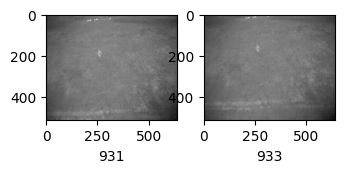

In [88]:
# Obtain indexes of e.g. files in position 9, 5 of scatterplot
p2p_zipped = tuple(zip(test_x,test_y))
querynames =[]
kk = []
for i in range(len(gt_test)):
    if p2p_zipped[i] == (5,3):
        querynames.append(gt_test[i][0])
        # teststring = gt_test[i][0]

for qname in querynames:
    for i in range(len(gt_test)):
        if gt_test[i][0]==qname:
            # print(i)
            kk.append(i)

# print images.
fig=plt.figure(figsize=[20,5])
for m in range(len(kk)):
    ax=fig.add_subplot(1, 10, m+1)
    plt.imshow(test_array[kk[m]][2])
    plt.xlabel(kk[m])

### Plot sample images with cluster + GT points

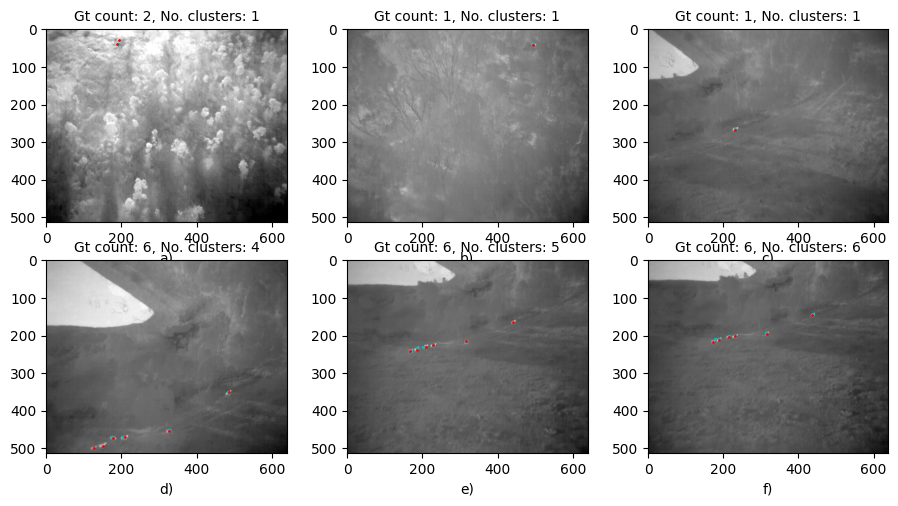

In [202]:
randnums = [747, 828, 882, 896, 919, 923]   #6.6, 3
# randnums = [643,874,891,908,897,921]  #5.5, 5

# num_trains=10
# eps=5.5
# min_samples=5

fig = plt.figure(figsize=[11, 5.5])
for i in range(len(randnums)):
    k = randnums[i]
    pts=[]
    Y = []
    X = []

    # Obtain pred points from all 5 trains and store in array Y
    for ii in range(num_trains): 
        pts_path = (os.path.join(p2p_dir,"vis","run_"+str(ii+1),test_array[k][0]+'.txt'))
        with open(pts_path) as load_file:
            pts.append([(line.split()) for line in load_file])

    for ii in range(num_trains): 
        for p in pts[ii]:
            x = int(float(p[0])*640)
            y = int(float(p[1])*512)
            Y.append([x,y])
    Y = np.array(Y)
    
    clustering = DBSCAN(eps=eps, min_samples=minpts).fit(Y)
    labels = clustering.labels_ # measure the performance of dbscan algo
    K = len(set(labels)) - (1 if -1 in labels else 0) # number of clusters

    # Find Cluster means 
    means = np.array([Y[labels == ii].mean(axis=0) for ii in range(0, K)])
    means = means.astype(int)

    # Obtain gt points
    with open(os.path.join(db_dir,"test",test_array[k][0]+'.txt')) as load_file:
        gt_points = [(line.split()) for line in load_file]
    for p in gt_points:
        x = int(float(p[1])*640)
        y = int(float(p[2])*512)
        X.append([x,y])
    X = np.array(X)

    ax = fig.add_subplot(2, 3, i+1)

    ax.imshow(test_array[k][2])
    if not means.size==0:
        # ax.scatter((np.array(means)[:,0]), (np.array(means)[:,1]), s=2, c='xkcd:azure') # plot consensus detections
        ax.scatter((np.array(means)[:,0]), (np.array(means)[:,1]), s=2, c='c') # plot consensus detections
        

    ax.scatter(X[:,0], X[:,1], c='r', s=1) # plot cluster vis
    plt.xlabel('{})'.format(alphabet_set[i]),fontsize=10)
    plt.title("Gt count: {}, No. clusters: {}".format(len(gt_points), K), fontsize=10)

    # ax.axis('off') 

# plt.subplots_adjust(wspace=0 )

# fig.savefig('consensus_undercount_5.png', bbox_inches='tight', dpi=100)

Gt count: 2
No. clusters: 2


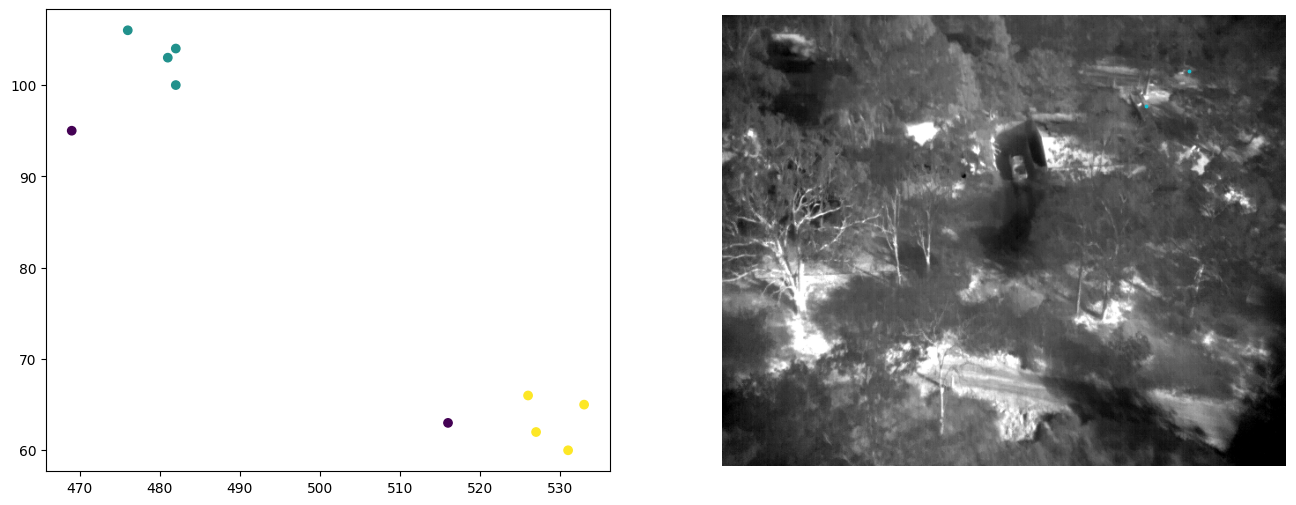

In [90]:
filename, K, means = cluster_img(500,num_trains,6.6,3,True)

### Grid Search
> run clus_scan.py in ./vis/misc

### Individual Scatterplots

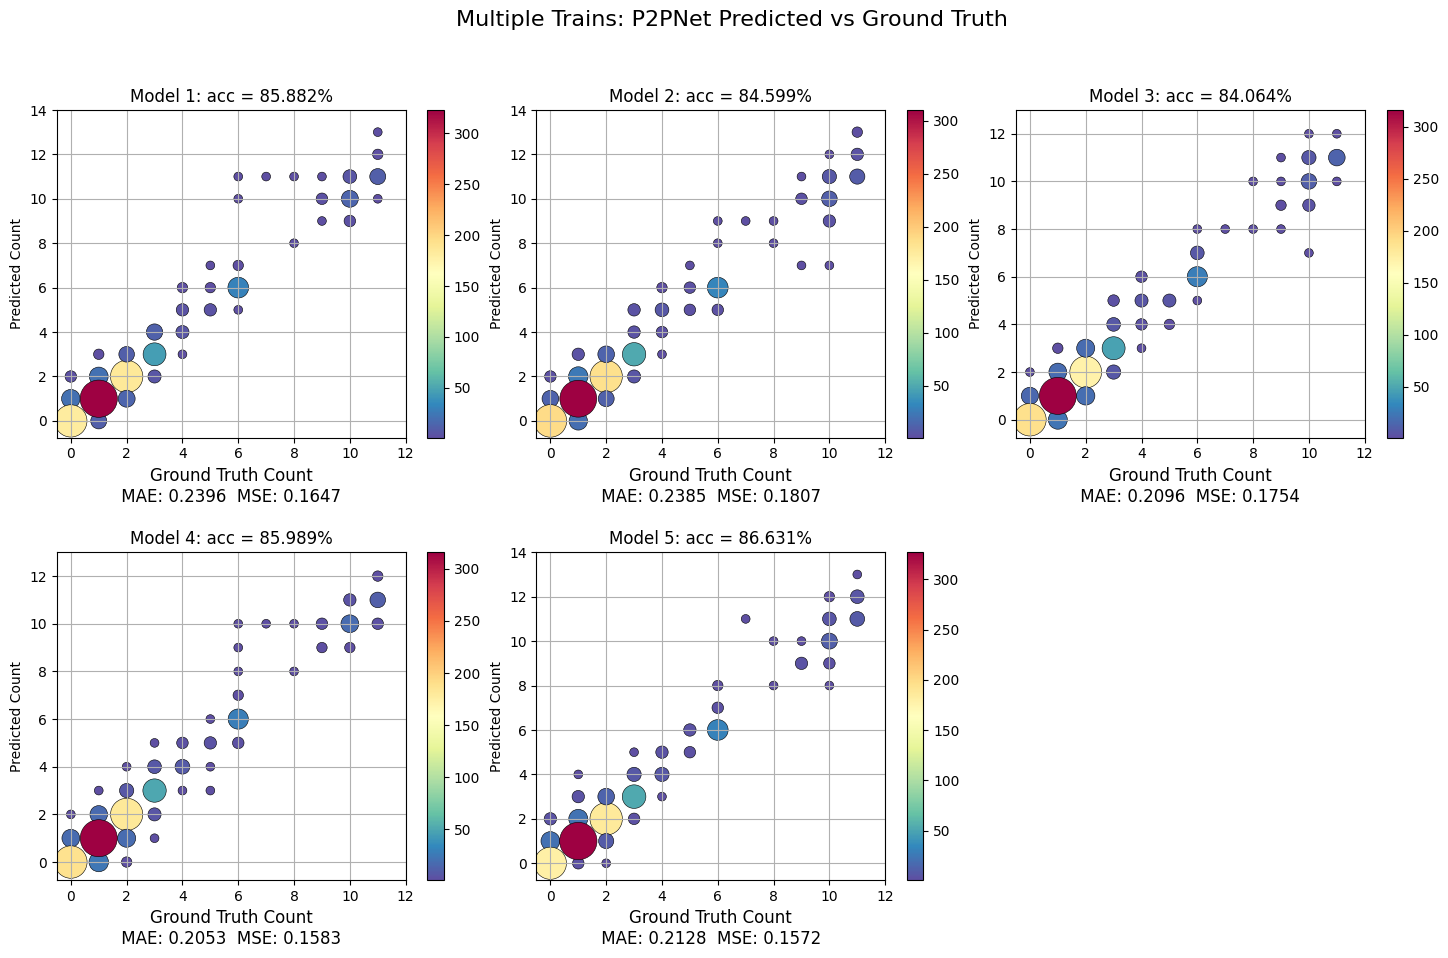

In [91]:
#scatterplots for all 5( or 10) trains
fig=plt.figure(figsize=[18,10])

gt_path=os.path.join(db_dir,"test_gt.txt")

gt_points = []
with open(gt_path) as f_label:
    for line in f_label:
        stripped_line = line.strip().split(' ')
        filename = ((stripped_line[0])) 
        count = (float(stripped_line[1])) 
        gt_points.append([filename, count])
gt_points.sort()

test_x=column(gt_points, 1)

for x in range(0,5): #5,10
    p2p_pr_path = os.path.join(p2p_dir,"vis","run_"+str(x+1),"p2p_test_pr.txt")
    
    p2p_pr_points = []
    with open(p2p_pr_path) as f_label:
        for line in f_label:
            stripped_line = line.strip().split(' ')
            filename = ((stripped_line[0])) 
            count = (float(stripped_line[1])) 
            p2p_pr_points.append([filename, count])
    p2p_pr_points.sort()

    test_y=column(p2p_pr_points, 1) #  I am just generating some test x and y values. Use your data here

    points=list(set(zip(test_x,test_y))) 
    count=[len([x for x,y in zip(test_x,test_y) if x==p[0] and y==p[1]]) for p in points]

    plot_x=[i[0] for i in points]
    plot_y=[i[1] for i in points]
    count=np.array(count)

    ax=fig.add_subplot(2, 3, x+1) #x-5+1
    plt.xlim(-0.5, max(test_x)+1)
    plt.ylim(-0.75, max(test_y)+1)
    plt.scatter(plot_x,plot_y,c=count,s=40*count**0.5,cmap='Spectral_r', linewidths=0.4, edgecolors=(0,0,0))


    g = zip(plot_x, plot_y, count)
    g = list(sorted(g,key=lambda b: b[0]))
    correct = 0
    for j in range(len(g)):
        if tuple(g[j])[0]==tuple(g[j])[1]:
            correct+=(tuple(g[j])[2])

    acc= correct/len(gt_test)*100

    mae = metrics.mean_squared_error(test_x,test_y)
    mse = metrics.mean_absolute_error(test_x,test_y)

    plt.colorbar()
    plt.xlabel('Ground Truth Count\n MAE: {:.4f}  MSE: {:.4f} '.format(mae,mse),fontsize=12)
    plt.ylabel('Predicted Count')
    plt.title("Model {}: acc = {:.3f}%".format(x+1,acc), fontsize=12)
    plt.grid()
fig.suptitle("Multiple Trains: P2PNet Predicted vs Ground Truth", fontsize=16)
fig.subplots_adjust(wspace=0.1, hspace=0.35)

plt.show()

# fig.savefig('./multiple_trains_scatter_5.png',bbox_inches='tight', dpi=100)

Other

YOLOv5 Format to P2P


In [93]:
def count_yolopred(filepth, thresh):
    p2p_anno = []
    count = 0
    with open(filepth, "r") as f:
        for lines in f:
            line = (lines.split())
            plot_x = float(line[2])
            plot_y = float(line[3])
            confidence = float(line[1])  
            if confidence > thresh: # only count if confidence score over thresh
                count+=1
                # p2p_anno.append([plot_x,plot_y])

    return count
    # return p2p_anno

In [94]:
thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
yolo_dir = "../../fusion/outputs_p2p_run1/yolo"

for thresh in thresholds:
    yolo_pts=[]

    for i in range(len(gt_test)):
        fname = gt_test[i][0].replace(".png", ".txt")
        filepth = os.path.join(yolo_dir,fname)
        yolo_pts.append(count_yolopred(filepth, thresh))    

    test_y = yolo_pts
    mae = metrics.mean_squared_error(test_x,test_y)
    mse = metrics.mean_absolute_error(test_x,test_y)
    points=list(set(zip(test_x,test_y))) 
    count=[len([x for x,y in zip(test_x,test_y) if x==p[0] and y==p[1]]) for p in points]

    plot_x=[i[0] for i in points]
    plot_y=[i[1] for i in points]
    count=np.array(count)

    g = zip(plot_x, plot_y, count)
    g = list(sorted(g,key=lambda b: b[0]))
    correct = 0
    for j in range(len(g)):
        if tuple(g[j])[0]==tuple(g[j])[1]:
            correct+=(tuple(g[j])[2])

    print("Threshold: {}  MAE: {:.4f}  MSE: {:.4f}  Acc: {:.3f}%".format(thresh,mae,mse,correct/len(gt_test)*100))


Threshold: 0.5  MAE: 0.3123  MSE: 0.1583  Acc: 88.128%
Threshold: 0.55  MAE: 0.2385  MSE: 0.1551  Acc: 87.380%
Threshold: 0.6  MAE: 0.2043  MSE: 0.1529  Acc: 86.631%
Threshold: 0.65  MAE: 0.2310  MSE: 0.1861  Acc: 83.316%
Threshold: 0.7  MAE: 0.5262  MSE: 0.3850  Acc: 67.701%
Threshold: 0.75  MAE: 2.1679  MSE: 0.9572  Acc: 39.251%
Threshold: 0.8  MAE: 6.5551  MSE: 1.6011  Acc: 24.706%


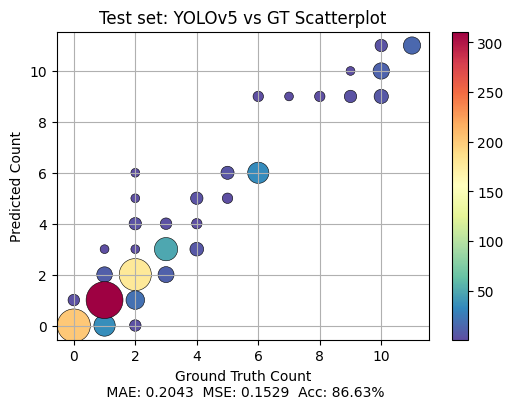

(None, None)

In [117]:
# YOLOv5 scatterplot for specified confidence threshold
confidence_threshold=0.6
yolo_dir = "../../fusion/outputs_p2p_run1/yolo"
yolo_pts=[]

for i in range(len(gt_test)):
    fname = gt_test[i][0].replace(".png", ".txt")
    filepth = os.path.join(yolo_dir,fname)
    yolo_pts.append(count_yolopred(filepth, confidence_threshold))    

test_y = yolo_pts
mae = metrics.mean_squared_error(test_x,test_y)
mse = metrics.mean_absolute_error(test_x,test_y)
points=list(set(zip(test_x,test_y))) 
count=[len([x for x,y in zip(test_x,test_y) if x==p[0] and y==p[1]]) for p in points]

plot_x=[i[0] for i in points]
plot_y=[i[1] for i in points]
count=np.array(count)

g = zip(plot_x, plot_y, count)
g = list(sorted(g,key=lambda b: b[0]))
correct = 0
for j in range(len(g)):
    if tuple(g[j])[0]==tuple(g[j])[1]:
        correct+=(tuple(g[j])[2])

fig=plt.figure(figsize=[6,4])
plt.scatter(plot_x,plot_y,c=count, s=40*count**0.5,cmap='Spectral_r', linewidths=0.4, edgecolors=(0,0,0))
plt.colorbar()
plt.xlabel('Ground Truth Count\n MAE: {:.4f}  MSE: {:.4f}  Acc: {:.2f}%'.format(mae,mse,correct/len(gt_test)*100)), plt.ylabel('Predicted Count')
plt.title("Test set: YOLOv5 vs GT Scatterplot")
plt.grid(), plt.show()



In [137]:
querynames=[]
kk=[]
zipped = tuple(zip(test_x,test_y))
for i in range(len(gt_test)):
    if zipped[i] == (4,4):
        querynames.append(gt_test[i][0])
        # teststring = gt_test[i][0]
for qname in querynames:
    for i in range(len(gt_test)):
        if gt_test[i][0]==qname:
            # print(i)
            kk.append(i)

# fig=plt.figure(figsize=[20,5])
# for m in range(5): #len(kk)
#     ax=fig.add_subplot(2, 5, m+1)
#     plt.imshow(test_array[kk[m]][2])
#     count=0
#     # db_path = os.path.join(db_dir,"test",test_array[kk[m]][0]+".txt")
#     # yolopth = os.path.join("../../yolov5/runs/val/exp2/labels",test_array[kk[m]][0]+".txt" )
#     yolopth = os.path.join("../../fusion/outputs_p2p_run1/yolo",test_array[kk[m]][0]+".txt" )
#     gt_path = os.path.join(db_dir,"test",test_array[kk[m]][0]+".txt")
#     with open(yolopth) as file:
#         for line in file:
#             w = int(float(line.split()[4])*640)
#             h = int(float(line.split()[5])*512)
#             x = int(float(line.split()[2])*640)-w/2
#             y = int(float(line.split()[3])*512)-h/2
#             # if float(line.split()[5])>0.5:
#             rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
#             ax.add_patch(rect)
#             count+=1
#     plt.xlabel((test_array[kk[m]][0],count), size=8)

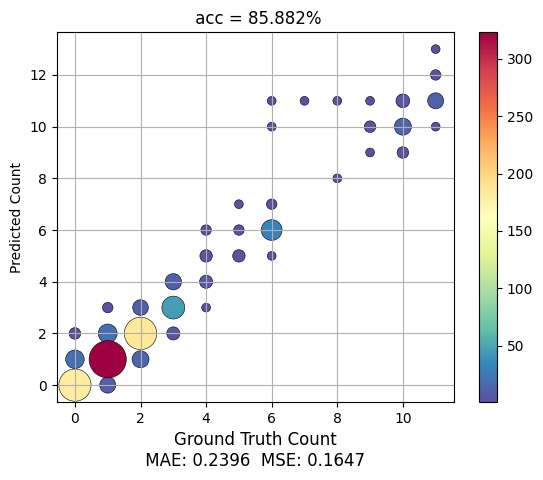

In [122]:
    
p2p_pr_points = []
with open(os.path.join(p2p_dir,"vis","run_1","p2p_test_pr.txt")) as f_label:
    for line in f_label:
        stripped_line = line.strip().split(' ')
        filename = ((stripped_line[0])) 
        count = (float(stripped_line[1])) 
        p2p_pr_points.append([filename, count])
p2p_pr_points.sort()
test_y=column(p2p_pr_points, 1) #  I am just generating some test x and y values. Use your data here
points=list(set(zip(test_x,test_y))) 
count=[len([x for x,y in zip(test_x,test_y) if x==p[0] and y==p[1]]) for p in points]

plot_x=[i[0] for i in points]
plot_y=[i[1] for i in points]
count=np.array(count)

ax=fig.add_subplot(1, 1, 1) #x-5+1
plt.scatter(plot_x,plot_y,c=count,s=40*count**0.5,cmap='Spectral_r', linewidths=0.4, edgecolors=(0,0,0))

g = zip(plot_x, plot_y, count)
g = list(sorted(g,key=lambda b: b[0]))
correct = 0
for j in range(len(g)):
    if tuple(g[j])[0]==tuple(g[j])[1]:
        correct+=(tuple(g[j])[2])

acc= correct/len(gt_test)*100

mae = metrics.mean_squared_error(test_x,test_y)
mse = metrics.mean_absolute_error(test_x,test_y)

plt.colorbar()
plt.xlabel('Ground Truth Count\n MAE: {:.4f}  MSE: {:.4f} '.format(mae,mse),fontsize=12)
plt.ylabel('Predicted Count'), plt.grid()
plt.title(" acc = {:.3f}%".format(acc), fontsize=12)

querynames=[]
kk=[]
p2p_zipped = tuple(zip(test_x,test_y))
for i in range(len(gt_test)):
    if yolo_zipped[i] == (5,6):
        querynames.append(gt_test[i][0])
        # teststring = gt_test[i][0]
for qname in querynames:
    for i in range(len(gt_test)):
        if gt_test[i][0]==qname:
            # print(i)
            kk.append(i)


In [149]:
# Images where one system is in error and see if the other system is correct
# p2p correct, yolo wrong: 757, 805, 931, 809
# yolo correct, p2p wrong: 764, 896, 929, (928,930), 807, 796
kk=[]
querynames=[]
for i in range(len(gt_test)):
    if p2p_zipped[i] == (11,10):
        querynames.append(gt_test[i][0])
        # teststring = gt_test[i][0]
for qname in querynames:
    for i in range(len(gt_test)):
        if gt_test[i][0]==qname:
            # print(i)
            kk.append(i)

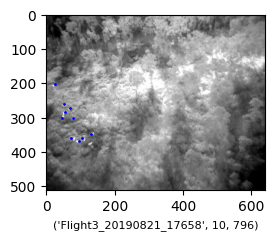

In [150]:
fig=plt.figure(figsize=[20,5])
for m in range(len(kk)): #len(kk)
    ax=fig.add_subplot(2, 5, m+1)
    plt.imshow(test_array[kk[m]][2])
    count=0

    p2ppath = os.path.join(p2p_dir,"vis","run_1","test",test_array[kk[m]][0]+".txt")
    # gt_path = os.path.join(db_dir,"test",test_array[kk[m]][0]+".txt")
    with open(p2ppath) as load_file:
        for lines in load_file:
            line = lines.split()
            x = int(float(line[0])*640)
            y = int(float(line[1])*512)
            plt.scatter(x, y, c=colors[z], s=1)#cv2.circle(img_to_draw, (x,y), size, (0, 0, 255), -1) #RED
            count+=1
    plt.xlabel((test_array[kk[m]][0],count,kk[m]), size=8)


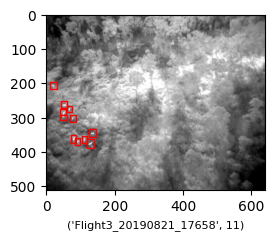

In [151]:
fig=plt.figure(figsize=[20,5])
for m in range(len(kk)): #len(kk)
    ax=fig.add_subplot(2, 5, m+1)
    plt.imshow(test_array[kk[m]][2])
    count=0
    # db_path = os.path.join(db_dir,"test",test_array[kk[m]][0]+".txt")
    # yolopth = os.path.join("../../yolov5/runs/val/exp2/labels",test_array[kk[m]][0]+".txt" )
    yolopth = os.path.join("../../fusion/outputs_p2p_run1/yolo",test_array[kk[m]][0]+".txt" )
    gt_path = os.path.join(db_dir,"test",test_array[kk[m]][0]+".txt")
    with open(yolopth) as file:
        for line in file:
            w = int(float(line.split()[4])*640)
            h = int(float(line.split()[5])*512)
            x = int(float(line.split()[2])*640)-w/2
            y = int(float(line.split()[3])*512)-h/2
            # if float(line.split()[5])>0.5:
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            count+=1
    plt.xlabel((test_array[kk[m]][0],count), size=8)

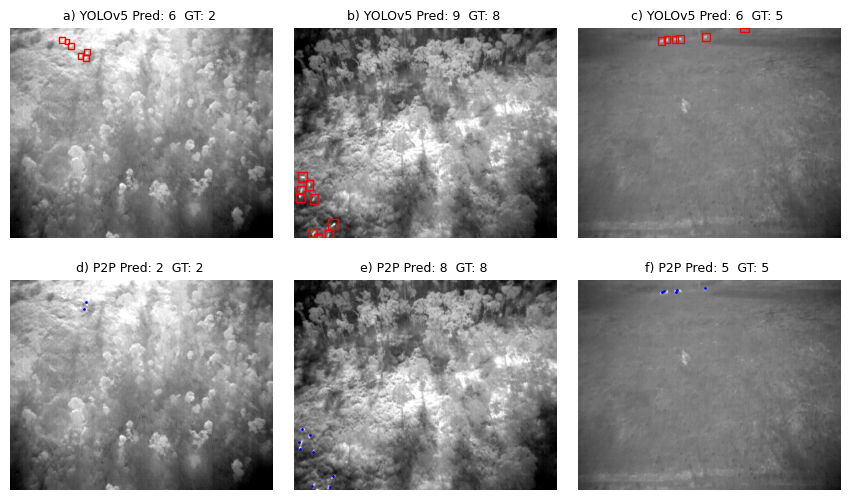

In [200]:
cp2p = [757, 805, 931] #p2p correct 807,809
# cp2p = [764, 896, 796] #yolo correct    #929


    
fig=plt.figure(figsize=[11,6])
for m in range(len(cp2p)): #len(kk)
    ax=fig.add_subplot(2, 3, m+1)
    plt.imshow(test_array[cp2p[m]][2])
    count=0

    yolopth = os.path.join("../../fusion/outputs_p2p_run1/yolo",test_array[cp2p[m]][0]+".txt" )
    with open(yolopth) as file:
        for line in file:
            w = int(float(line.split()[4])*640)
            h = int(float(line.split()[5])*512)
            x = int(float(line.split()[2])*640)-w/2
            y = int(float(line.split()[3])*512)-h/2
            # if float(line.split()[5])>0.5:
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            count+=1
    # plt.xlabel((test_array[cp2p[m]][0],count,"GT=",test_array[cp2p[m]][1]), size=8)
    plt.title("{}) YOLOv5 Pred: {}  GT: {} ".format(alphabet_set[m],count,test_array[cp2p[m]][1]), size=9)
    ax.axis('off') 
# fig=plt.figure(figsize=[15,7])
# for m in range(len(cp2p)): #len(kk)
    ax=fig.add_subplot(2, 3, len(cp2p)+m+1)
    plt.imshow(test_array[cp2p[m]][2])
    count=0

    p2ppath = os.path.join(p2p_dir,"vis","run_1","test",test_array[cp2p[m]][0]+".txt")
    # gt_path = os.path.join(db_dir,"test",test_array[kk[m]][0]+".txt")
    with open(p2ppath) as load_file:
        for lines in load_file:
            line = lines.split()
            x = int(float(line[0])*640)
            y = int(float(line[1])*512)
            plt.scatter(x, y, c=colors[z], s=1)#cv2.circle(img_to_draw, (x,y), size, (0, 0, 255), -1) #RED
            count+=1
    # plt.xlabel((test_array[cp2p[m]][0],count,cp2p[m],"GT=",test_array[cp2p[m]][1]), size=8)
    plt.title("{}) P2P Pred: {}  GT: {} ".format(alphabet_set[len(cp2p)+m],count,test_array[cp2p[m]][1]), size=9)
    ax.axis('off') 

plt.subplots_adjust(wspace=0)
